In [104]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,median_absolute_error
from sklearn.preprocessing import LabelEncoder

In [258]:
data = pd.read_excel("web-scrap.xlsx") 
data.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16
0,nom,prix,taille ecran,type ecran,type processeur,referance processeur,ram,rom,carte graphique,Referance carte graphique,Systeme d'exploitation,garanti,store,link,reference,image link
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PC Portable ASUS Chromebook C204 N4020 4Go 32 ...,"545,000 TND",11.6 Pouces,HD,Dual Core,"1,10 GHz up to 2.80 GHz",4 Go,32 Go eMMC,Graphique Intégrée,Intel UHD,CHROME OS,1 an,Mytek,https://www.mytek.tn/pc-portable-asus-chromebo...,C204MA-GJ0203,https://mk-media.mytek.tn/media/catalog/produc...
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PC Portable HP 15-Dw1000nk N4020 4Go 1To - Noir,"629,000 TND",15.6 Pouces,HD,Dual Core,"1,10 GHz up to 2.80 GHz",4 Go,1 To HDD,Graphique Intégrée,Intel UHD,Windows 10 Famille,1 an,Mytek,https://www.mytek.tn/pc-portable-hp-15-dw1000n...,280S8EA,https://mk-media.mytek.tn/media/catalog/produc...


In [259]:
data.shape

(3917, 16)

In [260]:
print(data.describe())

                                                  Column1        Column2  \
count                                                1959           1959   
unique                                               1819           1064   
top     Pc portable Gamer MSI Katana GF76 / i7 11é Gen...  1 299,000 TND   
freq                                                    3             12   

            Column3  Column4    Column5  \
count          1950     1959       1959   
unique           16       16         22   
top     15.6 Pouces  Full HD  Quad Core   
freq            800     1419        504   

                                                  Column6 Column7     Column8  \
count                                                1958    1959        1959   
unique                                                155      12          19   
top     Intel Core i5-1135G7, 11è Génération, 2.4 Ghz ...    8 Go  512 Go SSD   
freq                                                  184     541         371  

DATA  PREPARATION

In [261]:
data.dropna( inplace = True )

In [262]:
data = data.rename(columns=data.iloc[0]).loc[1:]

In [263]:
data = data.astype(str)

In [264]:
data.dtypes

nom                          object
prix                         object
taille ecran                 object
type ecran                   object
type processeur              object
referance processeur         object
ram                          object
rom                          object
carte graphique              object
Referance carte graphique    object
Systeme d'exploitation       object
garanti                      object
store                        object
link                         object
reference                    object
image link                   object
dtype: object

In [265]:
data['prix']

2         545,000 TND
4         629,000 TND
6         629,000 TND
8         685,000 TND
10        689,000 TND
            ...      
3908     8 849,000 DT
3910     8 969,000 DT
3912    10 419,000 DT
3914    10 999,000 DT
3916    11 179,000 DT
Name: prix, Length: 1936, dtype: object

In [266]:
for i in data.index :
    if ( "DT" in data["prix"][i] ) : 
        data["prix"][i]=data["prix"][i].replace("DT","")
    if ( "TND" in data["prix"][i] ) : 
        data["prix"][i]=data["prix"][i].replace("TND","")

In [267]:
data['prix'] = data['prix'].apply(lambda x: str(x).replace(u'\xa0', u''))   
data['prix'] = data['prix'].apply(lambda x: str(x).replace(u'\u202f034', u''))

In [268]:
for i in data.index :
    if ( "Go" in data["ram"][i] ) : 
        data["ram"][i]=data["ram"][i].replace("Go","")
    elif ("Mo" in data["ram"][i] ) :
        x = float(data["ram"][i].replace("Mo","")) / 100
        data["ram"][i] = str(x)

In [269]:
for i in data.index :
    if ( "Pouces" in data["taille ecran"][i] ) : 
        data["taille ecran"][i]=data["taille ecran"][i].replace("Pouces","")
    if ( '"' in data['taille ecran'][i] ) : 
        data['taille ecran'][i]=data['taille ecran'][i].replace('"','')

In [270]:
for i in data.index :
    if ( "ans" in data["garanti"][i] ) : 
        data["garanti"][i]=data["garanti"][i].replace("ans","")
    if ( "an" in data["garanti"][i] ) : 
        data["garanti"][i]=data["garanti"][i].replace("an","")
    

In [271]:
data.drop(2 , inplace=True)

In [272]:
data

,nom,prix,taille ecran,type ecran,type processeur,referance processeur,ram,rom,carte graphique,Referance carte graphique,Systeme d'exploitation,garanti,store,link,reference,image link
4,PC Portable HP 15-Dw1000nk N4020 4Go 1To - Noir,"629,000",15.6,HD,Dual Core,"1,10 GHz up to 2.80 GHz",4,1 To HDD,Graphique Intégrée,Intel UHD,Windows 10 Famille,1,Mytek,https://www.mytek.tn/pc-portable-hp-15-dw1000n...,280S8EA,https://mk-media.mytek.tn/media/catalog/produc...
6,PC Portable LENOVO V15 IGL Intel Celeron N4020...,"629,000",15.6,HD,Dual Core,"1,10 GHz up to 2.80 GHz",4,1 To HDD,Graphique Intégrée,Intel HD,FreeDos,1,Mytek,https://www.mytek.tn/pc-portable-lenovo-v15-ig...,82C30009FE,https://mk-media.mytek.tn/media/catalog/produc...
8,PC Portable HP 15-dw1000nk Dual Core 8Go 1To -...,"685,000",15.6,HD,Dual Core,"1,10 GHz up to 2.80 GHz",8,1 To HDD,Graphique Intégrée,Intel HD,Windows 10 Famille,1,Mytek,https://www.mytek.tn/pc-portable-hp-15-dw1000n...,280S8EA-8G,https://mk-media.mytek.tn/media/catalog/produc...
10,PC Portable LENOVO IdeaPad 3 15IGL05 N4020 4Go...,"689,000",15.6,HD,Dual Core,"1,10 GHz up to 2.80 GHz",4,1 To HDD,Graphique Intégrée,Intel UHD,FreeDos,1,Mytek,https://www.mytek.tn/pc-portable-lenovo-ideapa...,81WQ00GQFG,https://mk-media.mytek.tn/media/catalog/produc...
12,PC Portable LENOVO IdeaPad 3 15IGL05 N4020 4Go...,"689,000",15.6,HD,Dual Core,"1,10 GHz up to 2.80 GHz",4,1 To HDD,Graphique Intégrée,Intel UHD,FreeDos,1,Mytek,https://www.mytek.tn/pc-portable-lenovo-ideapa...,81WQ00GRFG,https://mk-media.mytek.tn/media/catalog/produc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3908,Pc portable MSI GE76 Raider 10 UG / i7 10é Gen...,"8849,000",17.3,Full HD,Intel Core i7,"Intel Core i7-10870H, 10é Gén, 2.2 Ghz up to 5...",32,1 To SSD,Nvidia GeForce,"Nvidia GeForce RTX 3070, 8 Go de mémoire Dédiée",Windows 10,2,Tunisianet,https://www.tunisianet.com.tn/pc-portable-tuni...,GE76-10UG-457TN,https://www.tunisianet.com.tn/198207-home/pc-p...
3910,Pc portable ASUS Zenbook Pro Duo UX582HM / i9 ...,"8969,000",15.6,Full HD,Intel Core i9,"Intel Core i9-11900H ,11è Génération, up to 4....",32,1 To SSD,Nvidia GeForce,"Nvidia GeForce RTX 3060, 6 Go de mémoire dédiée",FreeDos,2,Tunisianet,https://www.tunisianet.com.tn/pc-portable-tuni...,UX582HM-KY002W-2Y,https://www.tunisianet.com.tn/248883-home/pc-p...
3912,PC Portable Lenovo ThinkPad X1 Extreme / i7-11...,"10419,000",16,WQHD,Intel Core i7,"Intel Core i7-11800H, 11éme Génération, 2.3 Gh...",32,1 To SSD,Nvidia GeForce,"Nvidia GeForce RTX 3060, 6 Go de mémoire dédiée",Windows 11,1,Tunisianet,https://www.tunisianet.com.tn/pc-portable-tuni...,20Y6S1H100,https://www.tunisianet.com.tn/265811-home/pc-p...
3914,PC Portable Lenovo ThinkPad X1 Carbon / i9 10è...,"10999,000",14,4K,Intel Core i9,"Intel Core i9-10885H , 2.4 Ghz up to 5.3 Ghz, ...",32,2 To SSD,Nvidia GeForce,"Nvidia GeForce GTX 1650 Ti, 4 Go de mémoire dé...",Windows 10,1,Tunisianet,https://www.tunisianet.com.tn/pc-portable-tuni...,20TLS1FC00,https://www.tunisianet.com.tn/200285-home/pc-p...


In [273]:
data["rom"]

4       1 To HDD
6       1 To HDD
8       1 To HDD
10      1 To HDD
12      1 To HDD
          ...   
3908    1 To SSD
3910    1 To SSD
3912    1 To SSD
3914    2 To SSD
3916    1 To SSD
Name: rom, Length: 1935, dtype: object

In [274]:
marque = []
for i in data.index :
    if 'asus' in data['nom'][i].lower():
        marque.append('ASUS')
    elif 'hp' in data['nom'][i].lower():
        marque.append('HP')
    elif 'dell' in data['nom'][i].lower():
        marque.append('DELL')
    elif 'lenovo' in data['nom'][i].lower():
        marque.append('LENOVO')
    elif 'acer' in data['nom'][i].lower():
        marque.append('ACER')
    elif 'msi' in data['nom'][i].lower():
        marque.append('MSI')
    else :
        marque.append('OTHER')

In [275]:
data.drop('nom' , inplace=True , axis = 1)
data.insert(0, "marque", marque , True)

In [222]:
labelencoder_marque = LabelEncoder()
data['marque'] = labelencoder_marque.fit_transform(data['marque'])

In [276]:
data

,marque,prix,taille ecran,type ecran,type processeur,referance processeur,ram,rom,carte graphique,Referance carte graphique,Systeme d'exploitation,garanti,store,link,reference,image link
4,HP,"629,000",15.6,HD,Dual Core,"1,10 GHz up to 2.80 GHz",4,1 To HDD,Graphique Intégrée,Intel UHD,Windows 10 Famille,1,Mytek,https://www.mytek.tn/pc-portable-hp-15-dw1000n...,280S8EA,https://mk-media.mytek.tn/media/catalog/produc...
6,LENOVO,"629,000",15.6,HD,Dual Core,"1,10 GHz up to 2.80 GHz",4,1 To HDD,Graphique Intégrée,Intel HD,FreeDos,1,Mytek,https://www.mytek.tn/pc-portable-lenovo-v15-ig...,82C30009FE,https://mk-media.mytek.tn/media/catalog/produc...
8,HP,"685,000",15.6,HD,Dual Core,"1,10 GHz up to 2.80 GHz",8,1 To HDD,Graphique Intégrée,Intel HD,Windows 10 Famille,1,Mytek,https://www.mytek.tn/pc-portable-hp-15-dw1000n...,280S8EA-8G,https://mk-media.mytek.tn/media/catalog/produc...
10,LENOVO,"689,000",15.6,HD,Dual Core,"1,10 GHz up to 2.80 GHz",4,1 To HDD,Graphique Intégrée,Intel UHD,FreeDos,1,Mytek,https://www.mytek.tn/pc-portable-lenovo-ideapa...,81WQ00GQFG,https://mk-media.mytek.tn/media/catalog/produc...
12,LENOVO,"689,000",15.6,HD,Dual Core,"1,10 GHz up to 2.80 GHz",4,1 To HDD,Graphique Intégrée,Intel UHD,FreeDos,1,Mytek,https://www.mytek.tn/pc-portable-lenovo-ideapa...,81WQ00GRFG,https://mk-media.mytek.tn/media/catalog/produc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3908,MSI,"8849,000",17.3,Full HD,Intel Core i7,"Intel Core i7-10870H, 10é Gén, 2.2 Ghz up to 5...",32,1 To SSD,Nvidia GeForce,"Nvidia GeForce RTX 3070, 8 Go de mémoire Dédiée",Windows 10,2,Tunisianet,https://www.tunisianet.com.tn/pc-portable-tuni...,GE76-10UG-457TN,https://www.tunisianet.com.tn/198207-home/pc-p...
3910,ASUS,"8969,000",15.6,Full HD,Intel Core i9,"Intel Core i9-11900H ,11è Génération, up to 4....",32,1 To SSD,Nvidia GeForce,"Nvidia GeForce RTX 3060, 6 Go de mémoire dédiée",FreeDos,2,Tunisianet,https://www.tunisianet.com.tn/pc-portable-tuni...,UX582HM-KY002W-2Y,https://www.tunisianet.com.tn/248883-home/pc-p...
3912,LENOVO,"10419,000",16,WQHD,Intel Core i7,"Intel Core i7-11800H, 11éme Génération, 2.3 Gh...",32,1 To SSD,Nvidia GeForce,"Nvidia GeForce RTX 3060, 6 Go de mémoire dédiée",Windows 11,1,Tunisianet,https://www.tunisianet.com.tn/pc-portable-tuni...,20Y6S1H100,https://www.tunisianet.com.tn/265811-home/pc-p...
3914,LENOVO,"10999,000",14,4K,Intel Core i9,"Intel Core i9-10885H , 2.4 Ghz up to 5.3 Ghz, ...",32,2 To SSD,Nvidia GeForce,"Nvidia GeForce GTX 1650 Ti, 4 Go de mémoire dé...",Windows 10,1,Tunisianet,https://www.tunisianet.com.tn/pc-portable-tuni...,20TLS1FC00,https://www.tunisianet.com.tn/200285-home/pc-p...


In [277]:
SSD = []
HDD = []
for i in data.index :
     
        #data["garanti"][i]=data["garanti"][i].replace("ans","")
    new_data = ''.join((ch if ch in '0123456789' else ' ') for ch in data["rom"][i])
    numbers = [i for i in new_data.split()]
    if len(numbers) != 2 :
        if 'SSD' in data["rom"][i] :
            HDD.append(0)
            SSD.append(int(numbers[0]))
        else :
            HDD.append(int(numbers[0]))
            SSD.append(0)
    else :
        HDD.append(int(numbers[0]))
        SSD.append(int(numbers[1]))
for i in range(len(HDD)) :
    if HDD[i] == 1 :
        HDD[i] = 1000


In [278]:
data.drop('rom' , inplace=True , axis = 1)
data.insert(7, "HDD", HDD , True)
data.insert(8, "SSD", SSD , True)
data

,marque,prix,taille ecran,type ecran,type processeur,referance processeur,ram,HDD,SSD,carte graphique,Referance carte graphique,Systeme d'exploitation,garanti,store,link,reference,image link
4,HP,"629,000",15.6,HD,Dual Core,"1,10 GHz up to 2.80 GHz",4,1000,0,Graphique Intégrée,Intel UHD,Windows 10 Famille,1,Mytek,https://www.mytek.tn/pc-portable-hp-15-dw1000n...,280S8EA,https://mk-media.mytek.tn/media/catalog/produc...
6,LENOVO,"629,000",15.6,HD,Dual Core,"1,10 GHz up to 2.80 GHz",4,1000,0,Graphique Intégrée,Intel HD,FreeDos,1,Mytek,https://www.mytek.tn/pc-portable-lenovo-v15-ig...,82C30009FE,https://mk-media.mytek.tn/media/catalog/produc...
8,HP,"685,000",15.6,HD,Dual Core,"1,10 GHz up to 2.80 GHz",8,1000,0,Graphique Intégrée,Intel HD,Windows 10 Famille,1,Mytek,https://www.mytek.tn/pc-portable-hp-15-dw1000n...,280S8EA-8G,https://mk-media.mytek.tn/media/catalog/produc...
10,LENOVO,"689,000",15.6,HD,Dual Core,"1,10 GHz up to 2.80 GHz",4,1000,0,Graphique Intégrée,Intel UHD,FreeDos,1,Mytek,https://www.mytek.tn/pc-portable-lenovo-ideapa...,81WQ00GQFG,https://mk-media.mytek.tn/media/catalog/produc...
12,LENOVO,"689,000",15.6,HD,Dual Core,"1,10 GHz up to 2.80 GHz",4,1000,0,Graphique Intégrée,Intel UHD,FreeDos,1,Mytek,https://www.mytek.tn/pc-portable-lenovo-ideapa...,81WQ00GRFG,https://mk-media.mytek.tn/media/catalog/produc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3908,MSI,"8849,000",17.3,Full HD,Intel Core i7,"Intel Core i7-10870H, 10é Gén, 2.2 Ghz up to 5...",32,0,1,Nvidia GeForce,"Nvidia GeForce RTX 3070, 8 Go de mémoire Dédiée",Windows 10,2,Tunisianet,https://www.tunisianet.com.tn/pc-portable-tuni...,GE76-10UG-457TN,https://www.tunisianet.com.tn/198207-home/pc-p...
3910,ASUS,"8969,000",15.6,Full HD,Intel Core i9,"Intel Core i9-11900H ,11è Génération, up to 4....",32,0,1,Nvidia GeForce,"Nvidia GeForce RTX 3060, 6 Go de mémoire dédiée",FreeDos,2,Tunisianet,https://www.tunisianet.com.tn/pc-portable-tuni...,UX582HM-KY002W-2Y,https://www.tunisianet.com.tn/248883-home/pc-p...
3912,LENOVO,"10419,000",16,WQHD,Intel Core i7,"Intel Core i7-11800H, 11éme Génération, 2.3 Gh...",32,0,1,Nvidia GeForce,"Nvidia GeForce RTX 3060, 6 Go de mémoire dédiée",Windows 11,1,Tunisianet,https://www.tunisianet.com.tn/pc-portable-tuni...,20Y6S1H100,https://www.tunisianet.com.tn/265811-home/pc-p...
3914,LENOVO,"10999,000",14,4K,Intel Core i9,"Intel Core i9-10885H , 2.4 Ghz up to 5.3 Ghz, ...",32,0,2,Nvidia GeForce,"Nvidia GeForce GTX 1650 Ti, 4 Go de mémoire dé...",Windows 10,1,Tunisianet,https://www.tunisianet.com.tn/pc-portable-tuni...,20TLS1FC00,https://www.tunisianet.com.tn/200285-home/pc-p...


In [279]:
data = data.reset_index()

In [280]:
data = data.drop('index',axis=1)

In [281]:
def find_between( inputStr, firstSubstr, lastSubstr ):
    start, end = (-1,-1)
    try:
        start = inputStr.index( firstSubstr ) + len( firstSubstr )
    except ValueError:
        pass

    try:
        end = inputStr.index( lastSubstr, start )       
    except ValueError:
        pass

    return inputStr[start:end]   

In [282]:
data

,marque,prix,taille ecran,type ecran,type processeur,referance processeur,ram,HDD,SSD,carte graphique,Referance carte graphique,Systeme d'exploitation,garanti,store,link,reference,image link
0,HP,"629,000",15.6,HD,Dual Core,"1,10 GHz up to 2.80 GHz",4,1000,0,Graphique Intégrée,Intel UHD,Windows 10 Famille,1,Mytek,https://www.mytek.tn/pc-portable-hp-15-dw1000n...,280S8EA,https://mk-media.mytek.tn/media/catalog/produc...
1,LENOVO,"629,000",15.6,HD,Dual Core,"1,10 GHz up to 2.80 GHz",4,1000,0,Graphique Intégrée,Intel HD,FreeDos,1,Mytek,https://www.mytek.tn/pc-portable-lenovo-v15-ig...,82C30009FE,https://mk-media.mytek.tn/media/catalog/produc...
2,HP,"685,000",15.6,HD,Dual Core,"1,10 GHz up to 2.80 GHz",8,1000,0,Graphique Intégrée,Intel HD,Windows 10 Famille,1,Mytek,https://www.mytek.tn/pc-portable-hp-15-dw1000n...,280S8EA-8G,https://mk-media.mytek.tn/media/catalog/produc...
3,LENOVO,"689,000",15.6,HD,Dual Core,"1,10 GHz up to 2.80 GHz",4,1000,0,Graphique Intégrée,Intel UHD,FreeDos,1,Mytek,https://www.mytek.tn/pc-portable-lenovo-ideapa...,81WQ00GQFG,https://mk-media.mytek.tn/media/catalog/produc...
4,LENOVO,"689,000",15.6,HD,Dual Core,"1,10 GHz up to 2.80 GHz",4,1000,0,Graphique Intégrée,Intel UHD,FreeDos,1,Mytek,https://www.mytek.tn/pc-portable-lenovo-ideapa...,81WQ00GRFG,https://mk-media.mytek.tn/media/catalog/produc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,MSI,"8849,000",17.3,Full HD,Intel Core i7,"Intel Core i7-10870H, 10é Gén, 2.2 Ghz up to 5...",32,0,1,Nvidia GeForce,"Nvidia GeForce RTX 3070, 8 Go de mémoire Dédiée",Windows 10,2,Tunisianet,https://www.tunisianet.com.tn/pc-portable-tuni...,GE76-10UG-457TN,https://www.tunisianet.com.tn/198207-home/pc-p...
1931,ASUS,"8969,000",15.6,Full HD,Intel Core i9,"Intel Core i9-11900H ,11è Génération, up to 4....",32,0,1,Nvidia GeForce,"Nvidia GeForce RTX 3060, 6 Go de mémoire dédiée",FreeDos,2,Tunisianet,https://www.tunisianet.com.tn/pc-portable-tuni...,UX582HM-KY002W-2Y,https://www.tunisianet.com.tn/248883-home/pc-p...
1932,LENOVO,"10419,000",16,WQHD,Intel Core i7,"Intel Core i7-11800H, 11éme Génération, 2.3 Gh...",32,0,1,Nvidia GeForce,"Nvidia GeForce RTX 3060, 6 Go de mémoire dédiée",Windows 11,1,Tunisianet,https://www.tunisianet.com.tn/pc-portable-tuni...,20Y6S1H100,https://www.tunisianet.com.tn/265811-home/pc-p...
1933,LENOVO,"10999,000",14,4K,Intel Core i9,"Intel Core i9-10885H , 2.4 Ghz up to 5.3 Ghz, ...",32,0,2,Nvidia GeForce,"Nvidia GeForce GTX 1650 Ti, 4 Go de mémoire dé...",Windows 10,1,Tunisianet,https://www.tunisianet.com.tn/pc-portable-tuni...,20TLS1FC00,https://www.tunisianet.com.tn/200285-home/pc-p...


In [283]:
cpu_frequency = []
pos = []
for i in data.index :
    #print ( [int(s) for s in data['referance processeur'][i].split() if s.isdigit()] )
    a = find_between(data['referance processeur'][i].lower(),'to','ghz').strip().replace(",",".")
    if a == '' :
        a = find_between(data['referance processeur'][i].lower(),'up','ghz').strip().replace(",",".")
    if a == '' :
        a = find_between(data['referance processeur'][i].lower(),"jusqu'à",'ghz').strip().replace(",",".")
    if a == '' :
        a = find_between(data['referance processeur'][i].lower(),'2.3 /','ghz').strip().replace(",",".")
    if a == '' :
        a = find_between(data['referance processeur'][i].lower(),'','ghz').strip().replace(",",".")

    if len(a) > 4 :
        a = find_between(data['referance processeur'][i].lower(),'to',',').strip().replace(",",".")
        #print(data['referance processeur'][i])
        #print(i)
    if a == "" : 
        pos.append(i)

    #cpu_frequency.append(float(a))

In [284]:
pos

[964, 978, 981, 982, 998, 1865, 1867]

In [285]:
data['referance processeur'][964]

'(CPU 8 coeurs / GPU 7 coeurs / Neural Engine 16 coeurs)'

In [286]:
data = data.drop(pos)

In [287]:
cpu_frequency = []
pos = []
for i in data.index :
    #print ( [int(s) for s in data['referance processeur'][i].split() if s.isdigit()] )
    a = find_between(data['referance processeur'][i].lower(),'to','ghz').strip().replace(",",".")
    if a == '' :
        a = find_between(data['referance processeur'][i].lower(),'up','ghz').strip().replace(",",".")
    if a == '' :
        a = find_between(data['referance processeur'][i].lower(),"jusqu'à",'ghz').strip().replace(",",".")
    if a == '' :
        a = find_between(data['referance processeur'][i].lower(),'2.3 /','ghz').strip().replace(",",".")
    if a == '' :
        a = find_between(data['referance processeur'][i].lower(),'','ghz').strip().replace(",",".")

    if len(a) > 4 :
        a = find_between(data['referance processeur'][i].lower(),'to',',').strip().replace(",",".")
        

    cpu_frequency.append(float(a))

In [288]:
data.drop('referance processeur' , inplace=True , axis = 1)
data.insert(5, "cpu frequency", cpu_frequency , True)

In [289]:
data

,marque,prix,taille ecran,type ecran,type processeur,cpu frequency,ram,HDD,SSD,carte graphique,Referance carte graphique,Systeme d'exploitation,garanti,store,link,reference,image link
0,HP,"629,000",15.6,HD,Dual Core,2.8,4,1000,0,Graphique Intégrée,Intel UHD,Windows 10 Famille,1,Mytek,https://www.mytek.tn/pc-portable-hp-15-dw1000n...,280S8EA,https://mk-media.mytek.tn/media/catalog/produc...
1,LENOVO,"629,000",15.6,HD,Dual Core,2.8,4,1000,0,Graphique Intégrée,Intel HD,FreeDos,1,Mytek,https://www.mytek.tn/pc-portable-lenovo-v15-ig...,82C30009FE,https://mk-media.mytek.tn/media/catalog/produc...
2,HP,"685,000",15.6,HD,Dual Core,2.8,8,1000,0,Graphique Intégrée,Intel HD,Windows 10 Famille,1,Mytek,https://www.mytek.tn/pc-portable-hp-15-dw1000n...,280S8EA-8G,https://mk-media.mytek.tn/media/catalog/produc...
3,LENOVO,"689,000",15.6,HD,Dual Core,2.8,4,1000,0,Graphique Intégrée,Intel UHD,FreeDos,1,Mytek,https://www.mytek.tn/pc-portable-lenovo-ideapa...,81WQ00GQFG,https://mk-media.mytek.tn/media/catalog/produc...
4,LENOVO,"689,000",15.6,HD,Dual Core,2.8,4,1000,0,Graphique Intégrée,Intel UHD,FreeDos,1,Mytek,https://www.mytek.tn/pc-portable-lenovo-ideapa...,81WQ00GRFG,https://mk-media.mytek.tn/media/catalog/produc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,MSI,"8849,000",17.3,Full HD,Intel Core i7,5.0,32,0,1,Nvidia GeForce,"Nvidia GeForce RTX 3070, 8 Go de mémoire Dédiée",Windows 10,2,Tunisianet,https://www.tunisianet.com.tn/pc-portable-tuni...,GE76-10UG-457TN,https://www.tunisianet.com.tn/198207-home/pc-p...
1931,ASUS,"8969,000",15.6,Full HD,Intel Core i9,4.9,32,0,1,Nvidia GeForce,"Nvidia GeForce RTX 3060, 6 Go de mémoire dédiée",FreeDos,2,Tunisianet,https://www.tunisianet.com.tn/pc-portable-tuni...,UX582HM-KY002W-2Y,https://www.tunisianet.com.tn/248883-home/pc-p...
1932,LENOVO,"10419,000",16,WQHD,Intel Core i7,4.6,32,0,1,Nvidia GeForce,"Nvidia GeForce RTX 3060, 6 Go de mémoire dédiée",Windows 11,1,Tunisianet,https://www.tunisianet.com.tn/pc-portable-tuni...,20Y6S1H100,https://www.tunisianet.com.tn/265811-home/pc-p...
1933,LENOVO,"10999,000",14,4K,Intel Core i9,5.3,32,0,2,Nvidia GeForce,"Nvidia GeForce GTX 1650 Ti, 4 Go de mémoire dé...",Windows 10,1,Tunisianet,https://www.tunisianet.com.tn/pc-portable-tuni...,20TLS1FC00,https://www.tunisianet.com.tn/200285-home/pc-p...


In [290]:
data['carte graphique'].unique()

array(['Graphique Intégrée', 'AMD Radeon', 'Nvidia GeForce'], dtype=object)

In [257]:
labelencoder_cpu = LabelEncoder()
data['carte graphique'] = labelencoder_cpu.fit_transform(data['carte graphique'])

In [140]:
data['carte graphique'].unique()

array([1, 0, 2])

In [141]:
list(labelencoder_cpu.inverse_transform([1, 0, 2]))

['Graphique Intégrée', 'AMD Radeon', 'Nvidia GeForce']

In [291]:
data

,marque,prix,taille ecran,type ecran,type processeur,cpu frequency,ram,HDD,SSD,carte graphique,Referance carte graphique,Systeme d'exploitation,garanti,store,link,reference,image link
0,HP,"629,000",15.6,HD,Dual Core,2.8,4,1000,0,Graphique Intégrée,Intel UHD,Windows 10 Famille,1,Mytek,https://www.mytek.tn/pc-portable-hp-15-dw1000n...,280S8EA,https://mk-media.mytek.tn/media/catalog/produc...
1,LENOVO,"629,000",15.6,HD,Dual Core,2.8,4,1000,0,Graphique Intégrée,Intel HD,FreeDos,1,Mytek,https://www.mytek.tn/pc-portable-lenovo-v15-ig...,82C30009FE,https://mk-media.mytek.tn/media/catalog/produc...
2,HP,"685,000",15.6,HD,Dual Core,2.8,8,1000,0,Graphique Intégrée,Intel HD,Windows 10 Famille,1,Mytek,https://www.mytek.tn/pc-portable-hp-15-dw1000n...,280S8EA-8G,https://mk-media.mytek.tn/media/catalog/produc...
3,LENOVO,"689,000",15.6,HD,Dual Core,2.8,4,1000,0,Graphique Intégrée,Intel UHD,FreeDos,1,Mytek,https://www.mytek.tn/pc-portable-lenovo-ideapa...,81WQ00GQFG,https://mk-media.mytek.tn/media/catalog/produc...
4,LENOVO,"689,000",15.6,HD,Dual Core,2.8,4,1000,0,Graphique Intégrée,Intel UHD,FreeDos,1,Mytek,https://www.mytek.tn/pc-portable-lenovo-ideapa...,81WQ00GRFG,https://mk-media.mytek.tn/media/catalog/produc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,MSI,"8849,000",17.3,Full HD,Intel Core i7,5.0,32,0,1,Nvidia GeForce,"Nvidia GeForce RTX 3070, 8 Go de mémoire Dédiée",Windows 10,2,Tunisianet,https://www.tunisianet.com.tn/pc-portable-tuni...,GE76-10UG-457TN,https://www.tunisianet.com.tn/198207-home/pc-p...
1931,ASUS,"8969,000",15.6,Full HD,Intel Core i9,4.9,32,0,1,Nvidia GeForce,"Nvidia GeForce RTX 3060, 6 Go de mémoire dédiée",FreeDos,2,Tunisianet,https://www.tunisianet.com.tn/pc-portable-tuni...,UX582HM-KY002W-2Y,https://www.tunisianet.com.tn/248883-home/pc-p...
1932,LENOVO,"10419,000",16,WQHD,Intel Core i7,4.6,32,0,1,Nvidia GeForce,"Nvidia GeForce RTX 3060, 6 Go de mémoire dédiée",Windows 11,1,Tunisianet,https://www.tunisianet.com.tn/pc-portable-tuni...,20Y6S1H100,https://www.tunisianet.com.tn/265811-home/pc-p...
1933,LENOVO,"10999,000",14,4K,Intel Core i9,5.3,32,0,2,Nvidia GeForce,"Nvidia GeForce GTX 1650 Ti, 4 Go de mémoire dé...",Windows 10,1,Tunisianet,https://www.tunisianet.com.tn/pc-portable-tuni...,20TLS1FC00,https://www.tunisianet.com.tn/200285-home/pc-p...


In [143]:
len(data['type processeur'].unique())

19

In [292]:
type = []
nbr_cores = []
for i in data.index :
    if "intel" in data["type processeur"][i].lower() :
        type.append("Intel")
    elif "amd" in data["type processeur"][i].lower() :
        type.append("AMD")
    elif "apple" in data["type processeur"][i].lower() :
        type.append("Apple")
    else :
        type.append("Other")
    
    if "Dual Core" in data["type processeur"][i] or "Intel Celeron Dual Core" in data["type processeur"][i] or "AMD Dual Core" in data["type processeur"][i] or "Intel Pentium Dual Core" in data["type processeur"][i] or "Intel Core i3" in data["type processeur"][i]:
        nbr_cores.append(2)

    elif "Quad Core" in data["type processeur"][i] or "Intel Pentium Quad  Core" in data["type processeur"][i] or "AMD Ryzen 3" in data["type processeur"][i] or "Intel Core i5" in data["type processeur"][i] or "Intel Core i7" in data["type processeur"][i]   :
        nbr_cores.append(4)

    elif "AMD Ryzen 5" in data["type processeur"][i] or "Hexa Core" in data["type processeur"][i] or 'Intel Core i5 12ème Gén' in data["type processeur"][i] :
        nbr_cores.append(6)

    elif "AMD Ryzen 7" in data["type processeur"][i] or "Octa Core" in data["type processeur"][i] or "Apple M1" in data["type processeur"][i] or 'Intel Core i9' in data["type processeur"][i]:
        nbr_cores.append(8)

    elif "Intel Core i7 12ème Gén" in  data["type processeur"][i] or '12 cœurs' in  data["type processeur"][i] or 'AMD Ryzen 9' in  data["type processeur"][i] :
        nbr_cores.append(12)
    
    elif '14 Cœurs' in  data["type processeur"][i] :
        nbr_cores.append(14)

In [293]:
data["type processeur"].unique() 

array(['Dual Core', 'Quad Core', 'Hexa Core', 'Octa Core', '12 cœurs',
       '14 Cœurs', 'Intel Celeron Dual Core', 'AMD Dual Core',
       'Intel Pentium Dual Core', 'Intel Pentium Quad  Core',
       'Intel Core i3', 'AMD Ryzen 3 ', 'Intel Core i5', 'AMD Ryzen 5',
       'AMD Ryzen 7', 'Intel Core i7', 'Intel Core i5 12ème Gén',
       'Intel Core i7 12ème Gén', 'Intel Core i9'], dtype=object)

In [294]:
len(type)

1928

In [295]:
len(nbr_cores)

1928

In [296]:
data.drop('type processeur' , inplace=True , axis = 1)
data.insert(4, "type cpu", type , True)
data.insert(5, "nb cores", nbr_cores , True)

In [297]:
data

,marque,prix,taille ecran,type ecran,type cpu,nb cores,cpu frequency,ram,HDD,SSD,carte graphique,Referance carte graphique,Systeme d'exploitation,garanti,store,link,reference,image link
0,HP,"629,000",15.6,HD,Other,2,2.8,4,1000,0,Graphique Intégrée,Intel UHD,Windows 10 Famille,1,Mytek,https://www.mytek.tn/pc-portable-hp-15-dw1000n...,280S8EA,https://mk-media.mytek.tn/media/catalog/produc...
1,LENOVO,"629,000",15.6,HD,Other,2,2.8,4,1000,0,Graphique Intégrée,Intel HD,FreeDos,1,Mytek,https://www.mytek.tn/pc-portable-lenovo-v15-ig...,82C30009FE,https://mk-media.mytek.tn/media/catalog/produc...
2,HP,"685,000",15.6,HD,Other,2,2.8,8,1000,0,Graphique Intégrée,Intel HD,Windows 10 Famille,1,Mytek,https://www.mytek.tn/pc-portable-hp-15-dw1000n...,280S8EA-8G,https://mk-media.mytek.tn/media/catalog/produc...
3,LENOVO,"689,000",15.6,HD,Other,2,2.8,4,1000,0,Graphique Intégrée,Intel UHD,FreeDos,1,Mytek,https://www.mytek.tn/pc-portable-lenovo-ideapa...,81WQ00GQFG,https://mk-media.mytek.tn/media/catalog/produc...
4,LENOVO,"689,000",15.6,HD,Other,2,2.8,4,1000,0,Graphique Intégrée,Intel UHD,FreeDos,1,Mytek,https://www.mytek.tn/pc-portable-lenovo-ideapa...,81WQ00GRFG,https://mk-media.mytek.tn/media/catalog/produc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,MSI,"8849,000",17.3,Full HD,Intel,4,5.0,32,0,1,Nvidia GeForce,"Nvidia GeForce RTX 3070, 8 Go de mémoire Dédiée",Windows 10,2,Tunisianet,https://www.tunisianet.com.tn/pc-portable-tuni...,GE76-10UG-457TN,https://www.tunisianet.com.tn/198207-home/pc-p...
1931,ASUS,"8969,000",15.6,Full HD,Intel,8,4.9,32,0,1,Nvidia GeForce,"Nvidia GeForce RTX 3060, 6 Go de mémoire dédiée",FreeDos,2,Tunisianet,https://www.tunisianet.com.tn/pc-portable-tuni...,UX582HM-KY002W-2Y,https://www.tunisianet.com.tn/248883-home/pc-p...
1932,LENOVO,"10419,000",16,WQHD,Intel,4,4.6,32,0,1,Nvidia GeForce,"Nvidia GeForce RTX 3060, 6 Go de mémoire dédiée",Windows 11,1,Tunisianet,https://www.tunisianet.com.tn/pc-portable-tuni...,20Y6S1H100,https://www.tunisianet.com.tn/265811-home/pc-p...
1933,LENOVO,"10999,000",14,4K,Intel,8,5.3,32,0,2,Nvidia GeForce,"Nvidia GeForce GTX 1650 Ti, 4 Go de mémoire dé...",Windows 10,1,Tunisianet,https://www.tunisianet.com.tn/pc-portable-tuni...,20TLS1FC00,https://www.tunisianet.com.tn/200285-home/pc-p...


In [298]:
import re
for i in data.index :
	s = data['prix'][i].replace(",",".")
	s = re.sub(r"\s+", "", s, flags=re.UNICODE)	
	data['prix'][i]=float(s)

<ipython-input-298-9e44c3ea5a7b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['prix'][i]=float(s)


In [151]:
#data.to_excel('my_data.xlsx')

In [152]:
labelencoder_ecran = LabelEncoder()
data['type ecran'] = labelencoder_ecran.fit_transform(data['type ecran'])

In [153]:
labelencoder_cpu_type = LabelEncoder()
data['type cpu'] = labelencoder_cpu_type.fit_transform(data['type cpu'])

In [299]:
data

,marque,prix,taille ecran,type ecran,type cpu,nb cores,cpu frequency,ram,HDD,SSD,carte graphique,Referance carte graphique,Systeme d'exploitation,garanti,store,link,reference,image link
0,HP,629.0,15.6,HD,Other,2,2.8,4,1000,0,Graphique Intégrée,Intel UHD,Windows 10 Famille,1,Mytek,https://www.mytek.tn/pc-portable-hp-15-dw1000n...,280S8EA,https://mk-media.mytek.tn/media/catalog/produc...
1,LENOVO,629.0,15.6,HD,Other,2,2.8,4,1000,0,Graphique Intégrée,Intel HD,FreeDos,1,Mytek,https://www.mytek.tn/pc-portable-lenovo-v15-ig...,82C30009FE,https://mk-media.mytek.tn/media/catalog/produc...
2,HP,685.0,15.6,HD,Other,2,2.8,8,1000,0,Graphique Intégrée,Intel HD,Windows 10 Famille,1,Mytek,https://www.mytek.tn/pc-portable-hp-15-dw1000n...,280S8EA-8G,https://mk-media.mytek.tn/media/catalog/produc...
3,LENOVO,689.0,15.6,HD,Other,2,2.8,4,1000,0,Graphique Intégrée,Intel UHD,FreeDos,1,Mytek,https://www.mytek.tn/pc-portable-lenovo-ideapa...,81WQ00GQFG,https://mk-media.mytek.tn/media/catalog/produc...
4,LENOVO,689.0,15.6,HD,Other,2,2.8,4,1000,0,Graphique Intégrée,Intel UHD,FreeDos,1,Mytek,https://www.mytek.tn/pc-portable-lenovo-ideapa...,81WQ00GRFG,https://mk-media.mytek.tn/media/catalog/produc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,MSI,8849.0,17.3,Full HD,Intel,4,5.0,32,0,1,Nvidia GeForce,"Nvidia GeForce RTX 3070, 8 Go de mémoire Dédiée",Windows 10,2,Tunisianet,https://www.tunisianet.com.tn/pc-portable-tuni...,GE76-10UG-457TN,https://www.tunisianet.com.tn/198207-home/pc-p...
1931,ASUS,8969.0,15.6,Full HD,Intel,8,4.9,32,0,1,Nvidia GeForce,"Nvidia GeForce RTX 3060, 6 Go de mémoire dédiée",FreeDos,2,Tunisianet,https://www.tunisianet.com.tn/pc-portable-tuni...,UX582HM-KY002W-2Y,https://www.tunisianet.com.tn/248883-home/pc-p...
1932,LENOVO,10419.0,16,WQHD,Intel,4,4.6,32,0,1,Nvidia GeForce,"Nvidia GeForce RTX 3060, 6 Go de mémoire dédiée",Windows 11,1,Tunisianet,https://www.tunisianet.com.tn/pc-portable-tuni...,20Y6S1H100,https://www.tunisianet.com.tn/265811-home/pc-p...
1933,LENOVO,10999.0,14,4K,Intel,8,5.3,32,0,2,Nvidia GeForce,"Nvidia GeForce GTX 1650 Ti, 4 Go de mémoire dé...",Windows 10,1,Tunisianet,https://www.tunisianet.com.tn/pc-portable-tuni...,20TLS1FC00,https://www.tunisianet.com.tn/200285-home/pc-p...


In [170]:
x = data.drop(["index","prix","Referance carte graphique","Systeme d'exploitation","garanti","store","link","reference"	,"image link"],axis=1)
y = data["prix"] 

In [171]:
x

,marque,taille ecran,type cpu,nb cores,type ecran,cpu frequency,ram,HDD,SSD,carte graphique
0,3,15.6,2,2,4,2.8,4,1000,0,1
1,4,15.6,2,2,4,2.8,4,1000,0,1
2,3,15.6,2,2,4,2.8,8,1000,0,1
3,4,15.6,2,2,4,2.8,4,1000,0,1
4,4,15.6,2,2,4,2.8,4,1000,0,1
...,...,...,...,...,...,...,...,...,...,...
1930,5,17.3,1,4,3,5.0,32,0,1,2
1931,1,15.6,1,8,3,4.9,32,0,1,2
1932,4,16,1,4,11,4.6,32,0,1,2
1933,4,14,1,8,2,5.3,32,0,2,2


COOROLATION HEATMAP

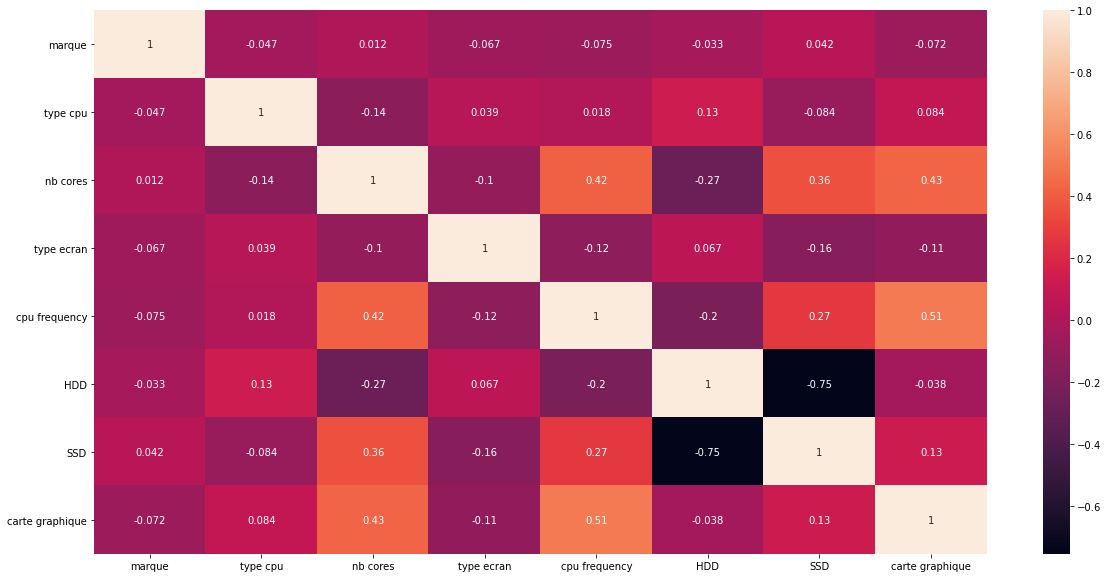

In [172]:
import seaborn as sn
plt.figure(figsize = (20,10))
coor = x.corr()
sn.heatmap(coor, annot=True)
plt.show()

LINEAR REGRESSION

In [173]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=3)
linreg1 = LinearRegression()
linreg1.fit(X_train,y_train)
y_pred = linreg1.predict(X_test)
print('test_score = ',linreg1.score(X_test,y_test)) 

test_score =  0.6523139316970447


In [174]:
from sklearn.metrics import r2_score
y_train_predict = linreg1.predict(X_train)
y_test_predict = linreg1.predict(X_test)


r2 = r2_score(y_train, y_train_predict)
 

print(f'Accuracy: ',r2)


Accuracy:  0.6990166579657766


GRADIENTBOOST

In [175]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=600, 
    max_depth=10, 
    learning_rate=0.01, 
    min_samples_split=3)

gbr.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
ypred = gbr.predict(X_test)
import sklearn.metrics as metrics
print("Accuracy:", metrics.r2_score(y_test, ypred))

Accuracy: 0.8135699930414242


XGBOOST REGRESSOR

In [176]:
x.dtypes

marque               int32
taille ecran        object
type cpu             int32
nb cores             int64
type ecran           int32
cpu frequency      float64
ram                 object
HDD                  int64
SSD                  int64
carte graphique      int32
dtype: object

In [177]:
x[["taille ecran", "ram"]] = x[["taille ecran", "ram"]].apply(pd.to_numeric)

In [178]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=3)

In [179]:
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
 
# Fitting the model
xgb_r.fit(X_train, y_train)
 
# Predict the model
pred = xgb_r.predict(X_test)
 
print("Accuracy:", metrics.r2_score(y_test, pred)) 

[09:13:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy: 0.8386815549135634


In [202]:
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE
xgb_x = xg.XGBRegressor(max_depth=2,gamma=2,eta=0.8,reg_alpha=0.9,reg_lambda=0.9 )
 
# Fitting the model
xgb_x.fit(X_train, y_train)
 
# Predict the model
pred = xgb_x.predict(X_test)
 
print("Accuracy:", metrics.r2_score(y_test, pred)) 

Accuracy: 0.8712622955856071


SAVING THE MODEL

In [203]:
import pickle
filename = 'model.sav'
pickle.dump(xgb_x, open(filename, 'wb'))

CLUSTERING

In [166]:
data

,index,marque,prix,taille ecran,type cpu,nb cores,type ecran,cpu frequency,ram,HDD,SSD,carte graphique,Referance carte graphique,Systeme d'exploitation,garanti,store,link,reference,image link
0,4,3,629.0,15.6,2,2,4,2.8,4,1000,0,1,Intel UHD,Windows 10 Famille,1,Mytek,https://www.mytek.tn/pc-portable-hp-15-dw1000n...,280S8EA,https://mk-media.mytek.tn/media/catalog/produc...
1,6,4,629.0,15.6,2,2,4,2.8,4,1000,0,1,Intel HD,FreeDos,1,Mytek,https://www.mytek.tn/pc-portable-lenovo-v15-ig...,82C30009FE,https://mk-media.mytek.tn/media/catalog/produc...
2,8,3,685.0,15.6,2,2,4,2.8,8,1000,0,1,Intel HD,Windows 10 Famille,1,Mytek,https://www.mytek.tn/pc-portable-hp-15-dw1000n...,280S8EA-8G,https://mk-media.mytek.tn/media/catalog/produc...
3,10,4,689.0,15.6,2,2,4,2.8,4,1000,0,1,Intel UHD,FreeDos,1,Mytek,https://www.mytek.tn/pc-portable-lenovo-ideapa...,81WQ00GQFG,https://mk-media.mytek.tn/media/catalog/produc...
4,12,4,689.0,15.6,2,2,4,2.8,4,1000,0,1,Intel UHD,FreeDos,1,Mytek,https://www.mytek.tn/pc-portable-lenovo-ideapa...,81WQ00GRFG,https://mk-media.mytek.tn/media/catalog/produc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,3908,5,8849.0,17.3,1,4,3,5.0,32,0,1,2,"Nvidia GeForce RTX 3070, 8 Go de mémoire Dédiée",Windows 10,2,Tunisianet,https://www.tunisianet.com.tn/pc-portable-tuni...,GE76-10UG-457TN,https://www.tunisianet.com.tn/198207-home/pc-p...
1931,3910,1,8969.0,15.6,1,8,3,4.9,32,0,1,2,"Nvidia GeForce RTX 3060, 6 Go de mémoire dédiée",FreeDos,2,Tunisianet,https://www.tunisianet.com.tn/pc-portable-tuni...,UX582HM-KY002W-2Y,https://www.tunisianet.com.tn/248883-home/pc-p...
1932,3912,4,10419.0,16,1,4,11,4.6,32,0,1,2,"Nvidia GeForce RTX 3060, 6 Go de mémoire dédiée",Windows 11,1,Tunisianet,https://www.tunisianet.com.tn/pc-portable-tuni...,20Y6S1H100,https://www.tunisianet.com.tn/265811-home/pc-p...
1933,3914,4,10999.0,14,1,8,2,5.3,32,0,2,2,"Nvidia GeForce GTX 1650 Ti, 4 Go de mémoire dé...",Windows 10,1,Tunisianet,https://www.tunisianet.com.tn/pc-portable-tuni...,20TLS1FC00,https://www.tunisianet.com.tn/200285-home/pc-p...


In [167]:
x = data.drop(["Referance carte graphique","Systeme d'exploitation","garanti"	],axis=1)
#y = data["prix"] 

In [168]:
from sklearn.cluster import KMeans 
l=[]
K = np.arange(1,25)
for i in K:
    km1 = KMeans(n_clusters=i)
    km1.fit(x)
    l.append(km1.inertia_)

ValueError: could not convert string to float: 'Mytek'

ValueError: x and y must have same first dimension, but have shapes (24,) and (0,)

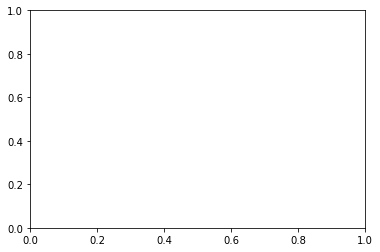

In [ ]:
plt.plot(K,l)
plt.grid()

In [ ]:
km = KMeans(n_clusters=6)
km.fit(x)
plt.scatter(x[:,0],x[:,1], c = km.predict(x))
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='r')
plt.grid()
plt.show()

ValueError: could not convert string to float: 'Mytek'

In [ ]:
#dict = { "taille ecran":[10],"type ecran":[2],"type cpu":[2],"nb cores":[2.0],"cpu frequency":[2.2],"ram":[2.0],"HDD" : [20.0],"SSD":[26.0],"carte graphique":[2]}
#df = pd.DataFrame(dict)
#print ( type(taille_ecran) )
#price = xgb_r.predict(df)

In [ ]:
#print(price)

In [ ]:
#model = pickle.load(open("model.sav", 'rb'))
#model.predict(df)








In [ ]:
#model.get_booster().feature_names

In [ ]:
#pip install -U scikit-learn

In [ ]:
labelencoder_marque.inverse_transform([0,1,2,3,4,5,6])

array(['ACER', 'ASUS', 'DELL', 'HP', 'LENOVO', 'MSI', 'OTHER'],
      dtype=object)

In [ ]:
labelencoder_marque.get_params

<bound method BaseEstimator.get_params of LabelEncoder()>

In [ ]:
float('635,000'.replace(",","."))

635.0

In [ ]:
data = pd.read_excel('C:/Users/trabe/OneDrive/Bureau/my_data1.xlsx')
x = []
y = []
for i in data.index :
    for j in data.index:
        if data['reference'][i] == data['reference'][j] :
            x.append(i)
            y.append(j)
y


[0,
 200,
 1,
 201,
 2,
 207,
 3,
 208,
 4,
 5,
 205,
 6,
 212,
 7,
 8,
 214,
 9,
 10,
 215,
 11,
 12,
 218,
 13,
 14,
 15,
 16,
 220,
 17,
 219,
 18,
 236,
 19,
 237,
 20,
 238,
 21,
 235,
 22,
 224,
 23,
 231,
 24,
 25,
 26,
 27,
 241,
 28,
 240,
 29,
 232,
 30,
 251,
 31,
 32,
 33,
 34,
 233,
 35,
 36,
 230,
 37,
 38,
 41,
 250,
 39,
 40,
 38,
 41,
 250,
 42,
 243,
 43,
 44,
 45,
 249,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 274,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 278,
 84,
 85,
 279,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 292,
 97,
 293,
 98,
 294,
 99,
 100,
 299,
 101,
 102,
 103,
 322,
 104,
 105,
 106,
 306,
 107,
 108,
 109,
 311,
 110,
 312,
 111,
 112,
 113,
 114,
 115,
 316,
 116,
 319,
 117,
 118,
 119,
 324,
 120,
 121,
 122,
 123,
 337,
 124,
 125,
 126,
 320,
 127,
 321,
 128,
 318,
 129,
 130,
 333,
 131,
 331,
 132,
 133,
 134,
 135,
 1

In [ ]:
data = pd.read_excel('C:/Users/trabe/OneDrive/Bureau/my_data1.xlsx')
data.index

RangeIndex(start=0, stop=667, step=1)

In [ ]:
data = pd.read_excel('C:/Users/trabe/OneDrive/Bureau/my_data1.xlsx')
data = data.sort_values(by= 'prix' )
product = []
prix = []
link1 = []
link2 = []
for i in range(len(data)) :
    for j in range(i+1 , len(data)) :
        if data['reference'][i] == data['reference'][j] :
            product.append(data['nom'][i])
            prix.append(str(data['prix'][i]) + str(data['prix'][j]))
            link1.append(data['link'][i])
            link2.append(data['link'][j])
            

In [ ]:
print(product[0])
print(prix[0])
print(link1[0])
print(link2[0])

PC Portable LENOVO V15 IGL Intel Celeron N4020 4Go 1To - Gris
635649
https://www.mytek.tn/pc-portable-lenovo-v15-igl-intel-celeron-n4020-4go-1to-gris-82c30009fe.html
https://www.tunisianet.com.tn/pc-portable-tunisie/51363-pc-portable-lenovo-v15-igl-dual-core-4-go.html


In [ ]:
len(link1[1])

79

In [ ]:
product

['PC Portable LENOVO V15 IGL Intel Celeron N4020 4Go 1To - Gris',
 'PC Portable HP 15-Dw1000nk N4020 4Go 1To - Noir (280S8EA)',
 'PC Portable LENOVO IdeaPad 3 15IGL05 N4020 4Go 1To - Gris ',
 'PC Portable LENOVO IdeaPad 3 15IGL05 N4020 4Go 1To - Noir',
 'PC Portable LENOVO IdeaPad 3 15IGL05 N4020 4Go 1To - Bleu ',
 'PC Portable LENOVO V14 IGL N4020 4Go 1To - Gris ',
 'PC Portable LENOVO IdeaPad 3 15IGL05 N4020 4Go 1To - Gris ',
 'PC Portable LENOVO IdeaPad 3 15IGL05 N4020 4Go 1To - Noir (81WQ00GYFG)',
 'PC Portable LENOVO IdeaPad 3 15IGL05 N4020 4Go 1To - Gris ',
 'PC Portable LENOVO IdeaPad 3 15IGL05 N4020 4Go 1To - Bleu (81WQ00GUFG-2Y)',
 'PC Portable LENOVO IdeaPad 3 15IGL05 N4020 4Go 1To - Noir (81WQ00GYFG-2Y)',
 'PC Portable ASUS E210MA Intel Celeron N4020 4Go 128 Go eMMC- Noir ',
 'PC Portable ASUS E210MA Intel Celeron N4020 4Go 128 Go eMMC- Rose ',
 'PC Portable ASUS E210MA Intel Celeron N4020 4Go 128 Go eMMC- Blanc ',
 'PC Portable ASUS E210MA Intel Celeron N4020 4Go 128 Go eMM

In [ ]:
data = pd.read_excel('C:/Users/trabe/OneDrive/Bureau/my_data1.xlsx')
data = data.sort_values(by='prix')
nom = []
img = []
store1 = []
store2 = []
prix1 = []
prix2 = []
link1 = []
link2 = []
for i in range(len(data)):
    if data['reference'][i] == "B150-EJ2854W-2Y-12" and len(nom) == 0 :
        nom.append(data['nom'][i])
        store1.append(data['store'][i])
        img.append(data['image link'][i])
        link1.append(data['link'][i])
        prix1.append(data['prix'][i])
    elif data['reference'][i] == "B150-EJ2854W-2Y-12" and len(nom) == 1 :
        store2.append(data['store'][i])
        prix2.append(data['prix'][i])
        link2.append(data['link'][i])
        """if len(prix1) > 0 and r == 0:
            r = 1
            for i in data.index:
                print(data['prix'][i])
                print(prix1[0])
                if float(data['prix'][i]) < float(prix1[0]) + 30 and float(data['prix'][i]) > float(prix1[0]) - 30:
                    recomended_nom.append(data['nom'][i])
                    recomended_store.append(data['store'][i])
                    recomended_link.append(data['link'][i])
                    recomended_img.append(data['image link'][i])
                    recomended_prix.append(data['prix'][i])"""

dict = zip(nom, store1, link1,  img, prix1)

       # recomended = zip(recomended_nom, recomended_store, recomended_link, recomended_img, recomended_prix)
#context = {'dict': dict}
#for nom, store1, store2, link1, link2, img, prix1, prix2 in dict :
 #   print(nom)
print (tuple(dict))


(("data['nom'][i]", 'Tunisianet', 'https://www.tunisianet.com.tn/pc-portable-tunisie/58095-pc-portable-asus-expertbook-b1-b1500-i3-11e-gen-12-go-noir.html', 'https://www.tunisianet.com.tn/263096-home/pc-portable-asus-expertbook-b1-b1500-i3-11e-gen-12-go-noir.jpg', 1628),)
